# PROBLEM STATEMENT

## Create a Machine Learning model using various Classification Models to predict rainfall. 

### Questions 

#### 1. Your views about the problem statement? 

Answer: The problem statement involves creating a Machine Learning model to predict rainfall in Sydney using various classification models. The data provided contains weather information from 2008 to 2017, including various features such as temperature, humidity, pressure, and more.The views  about the problem statement are as follows:

- Relevance: The problem of rainfall prediction is highly relevant and valuable, as accurate weather forecasts are crucial for various activities and planning in daily life. Having a reliable weather prediction model can benefit the community by helping people make informed decisions and take appropriate actions based on weather conditions.

- Machine Learning Approach: The use of Machine Learning models, specifically classification techniques, is appropriate for this problem. Classification models are well-suited for predicting binary outcomes, such as whether it will rain tomorrow . 

- Impact: Accurate weather prediction can have a significant impact on people's lives, businesses, agriculture, and infrastructure planning. A successful model can provide valuable insights for individuals, organizations, and policymakers to make informed decisions based on upcoming weather conditions.

- Challenges: The challenges in this project may include dealing with missing data, selecting relevant features, optimizing hyperparameters for the ML models, and handling the imbalance in the target variable (RainTomorrow: Yes/No). Additionally, interpreting the models' predictions and understanding the importance of different features in the model's decision-making process might be important for the editor and readers.

- Evaluation Metric: For a classification problem like this, commonly used evaluation metrics include accuracy, precision, recall, F1-score, and ROC-AUC. The choice of the evaluation metric will depend on the specific requirements and the importance of false positives and false negatives in the context of weather prediction.

####  2. What will be your approach to solving this task? 

Answer: To solve the rainfall prediction task using Machine Learning, the approach would involve the following steps:

a. Data Understanding and  Exploration:

- Loading the provided weather dataset and explore its structure and contents.
- Checking for missing values, data types, and statistical summaries of the features.

b. Data Preprocessing:

- Handle missing values
- Convert categorical variables  into numerical format 
- Split the data into training and testing sets

c. Feature Engineering:

- create new features from existing ones that might enhance the model predictive power. 

d. Model Selection and Training:

- Implement various classification models
- Train the models on the training data and evaluate their performance on the testing data using appropriate evaluation metric.

e. Model Evaluation:
    
- Compare the performance of different models and select the one with the highest accuracy and overall best performance.
- Analyze the confusion matrix and other relevant metrics to understand the model strengths and weaknesses in predicting rainfall.

#### 3. What were the available ML model options you had to perform this task?

Answer : For classification task, the below mentioned are the available ML models:

- Multiple Logistic Regression

- Ridge

- Linear Discriminant Analysis(LDA)

- K-Nearest Neighbors

- Decision Tree

- Bagging

- Random Forest

- Gradient Boosting

- AdaBoost

- XGBoost

#### 4. Which model’s performance is best and what could be the possible reason for that?  

Answer : Linear Discriminant Analysis (LDA) performed better with an accuracy score of  83 % than the other models  in the context of rainfall prediction. The reason are as follows:

- Linear Relationship Assumption: LDA assumes that the data from different classes (in this case, "RainTomorrow_Yes"  1 and 0) are linearly separable. If the relationship between the features and the target variable (rainfall) is relatively linear, LDA  capture it effectively, leading to better performance.

- Dimensionality Reduction: LDA performs dimensionality reduction while maximizing the separation between classes. It tries to find the direction that best separates the classes. This reduction in dimensionality can be beneficial when dealing with high-dimensional datasets, as it reduces the risk of overfitting and improves the generalization of the model.

- Robust to Multicollinearity: LDA is less sensitive to multicollinearity among the features compared to some other models, such as multiple logistic regression. If there are strong correlations between predictors, LDA can handle it better and still provide good predictive performance.

- Balancing Class Distribution: If the dataset is imbalanced , LDA can still perform well. It tries to find a projection that maximizes the separation between classes, even with imbalanced data.

- Assumption of Normality: LDA assumes that the features follow a multivariate normal distribution in each class. 

- Regularization: Some of the other models like Ridge, Gradient Boosting, and XGBoost have regularization techniques that may not be well-suited for this dataset. LDA, being a linear model, has a simple structure and regularization may not be necessary.

- Limited Data: When the dataset is relatively small, more complex models like Random Forest, Gradient Boosting, or XGBoost may not have enough data to learn complex relationships, leading to overfitting. LDA, being a simpler model, can be more stable and perform better in such situations.

#### 5. What steps can you take to improve this selected model’s performance even further?   

Answer: To further improve the performance of the selected Linear Discriminant Analysis (LDA) model for rainfall prediction, we can consider the following steps:

- Feature Engineering: Exploring the possibility of creating additional relevant features or transforming existing ones to better capture patterns in the data. 

- Hyperparameter Tuning: Fine-tune the hyperparameters of the LDA model. We can use techniques like Grid Search or Randomized Search to explore a range of hyperparameter values and find the optimal combination that maximizes performance.

- Cross-Validation: Using cross-validation will help to evaluate the model's performance more robustly. This will help to estimate the model's generalization performance and reduce the risk of overfitting.

- Domain Knowledge: Incorporating domain knowledge and insights into the feature engineering and modeling process. Understanding the relevant weather factors and their impact on rainfall can guide  in selecting the most appropriate features and modeling approach.

- Data Collection:  Collecting more recent and comprehensive weather data to update the training dataset. The use of up-to-date data can potentially improve the model's predictive ability for current weather patterns.


## IMPORT NECESSARY LIBRARY  

In [1]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import confusion_matrix
from sklearn.metrics  import  precision_score,recall_score,roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#  LOAD DATASET

In [2]:
# Reading the dataset
df= pd.read_csv('C:\\Users\\ntpc\\Desktop\\sydney_rain prediction.csv',header=0)

In [3]:
# Fetching First 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
#checking shape of the dataset
df.shape

(3337, 17)

In [5]:
# checking column name
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [6]:
# Checking type of column data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [7]:
#Checking null vales
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday' has null values

In [8]:
# summarize data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [9]:
# dropping null values
df.dropna(subset=['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday'],inplace=True)

In [10]:
# Checking shape of data post removing null values
df.shape

(2677, 17)

In [11]:
df.isnull().sum()

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [12]:
#creating dummy variable for RainToday
df = pd.get_dummies(df, columns=['RainToday'], drop_first=True)

In [13]:
#creating dummy variable for RainTomorrow
df = pd.get_dummies(df, columns=['RainTomorrow'], drop_first=True)

<AxesSubplot:xlabel='RainTomorrow_Yes', ylabel='count'>

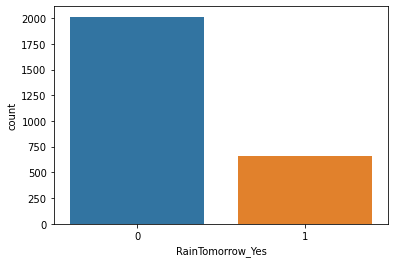

In [14]:
# Visualizing RainTomorrow_Yes
sns.countplot(x='RainTomorrow_Yes',data=df)

### Implementing Variable Tranformation and Variable deletion to improve the performance and interpretability of machine learning models  

In [15]:
# Transforming Variable Max Temp and Min Temp 
df['RangeTemp'] = df['MaxTemp'] - df['MinTemp']

In [16]:
# Dropping Variable Max Temp and Min Temp
df.drop(['MinTemp', 'MaxTemp'], axis=1, inplace=True)

In [17]:
# Dropping Variable Date and Location  as they are not be useful for prediction
df.drop(columns=["Date", "Location"], axis=1,inplace=True)

In [18]:
# Creating Avg_Humidity variable
df['Avg_Humidity']=(df['Humidity3pm'] + df['Humidity9am'])/2

In [19]:
# Creating Avg_Pressure variable
df['Avg_Pressure']=(df['Pressure3pm'] + df['Pressure9am'])/2

In [20]:
# Creating Avg_Cloud variable
df['Avg_Cloud']=(df['Cloud3pm'] + df['Cloud9am'])/2

In [21]:
# Creating Avg_Tempd variable
df['Avg_Temp']=(df['Temp3pm'] + df['Temp9am'])/2

In [22]:
# dropping the irrelevant columns
df.drop(['Humidity3pm', 'Humidity9am','Pressure3pm','Pressure9am','Cloud3pm','Cloud9am','Temp3pm','Temp9am'], axis=1, inplace=True)

In [23]:
df.head()

,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,RangeTemp,Avg_Humidity,Avg_Pressure,Avg_Cloud,Avg_Temp
0,15.6,6.2,0.0,1,1,2.9,88.0,1017.50,8.0,20.80
1,6.0,3.4,2.7,1,1,6.1,78.0,1017.15,7.0,23.60
2,6.6,2.4,0.1,1,1,2.9,87.0,1016.15,7.5,23.25
3,18.8,2.2,0.0,1,1,2.6,86.5,1013.00,8.0,21.15
5,1.6,2.6,8.6,1,1,7.0,65.5,1000.65,6.0,24.90


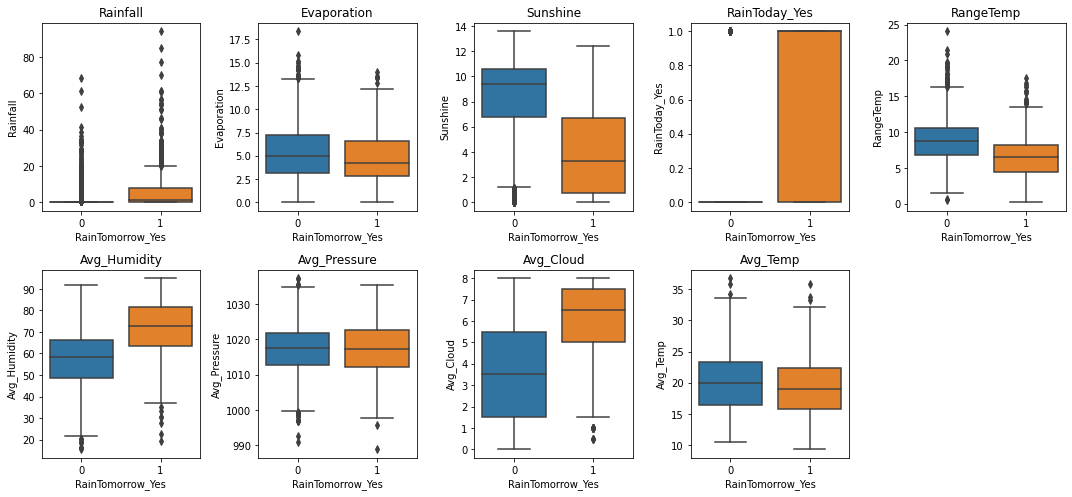

In [25]:
import matplotlib.pyplot as plt
numeric_features = [ 'Rainfall', 'Evaporation', 'Sunshine','RainToday_Yes','RangeTemp','Avg_Humidity','Avg_Pressure','Avg_Cloud','Avg_Temp']
                    

# Visualizing the relationship between numeric features and target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x='RainTomorrow_Yes', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

### Removing Outliers  

In [26]:
# removing outliers using Z-score method
def remove_outliers_zscore(df,threshold=3):
    z_scores = df.apply(lambda x: (x - x.mean()) / x.std())
    return df[(z_scores < threshold).all(axis=1)]

# Removing outliers from the dataset
df= remove_outliers_zscore(df)


In [27]:
df.shape

(2569, 10)

In [28]:
# checking duplicates
duplicates = df.duplicated()

print(df[duplicates])

Empty DataFrame
Columns: [Rainfall, Evaporation, Sunshine, RainToday_Yes, RainTomorrow_Yes, RangeTemp, Avg_Humidity, Avg_Pressure, Avg_Cloud, Avg_Temp]
Index: []


In [29]:
# Checking correlation
df.corr()


,Rainfall,Evaporation,Sunshine,RainToday_Yes,RainTomorrow_Yes,RangeTemp,Avg_Humidity,Avg_Pressure,Avg_Cloud,Avg_Temp
Rainfall,1.000000,-0.179160,-0.274630,0.728010,0.286507,-0.220243,0.344811,0.030657,0.269691,-0.081888
Evaporation,-0.179160,1.000000,0.199022,-0.230258,-0.082434,-0.142704,-0.269738,-0.325620,-0.035966,0.573413
Sunshine,-0.274630,0.199022,1.000000,-0.334117,-0.495263,0.556376,-0.577507,-0.089099,-0.820486,0.227816
RainToday_Yes,0.728010,-0.230258,-0.334117,1.000000,0.316352,-0.269488,0.377848,0.038295,0.317627,-0.113697
RainTomorrow_Yes,0.286507,-0.082434,-0.495263,0.316352,1.000000,-0.311163,0.422938,-0.016759,0.438824,-0.078109
RangeTemp,-0.220243,-0.142704,0.556376,-0.269488,-0.311163,1.000000,-0.509761,-0.029154,-0.527106,-0.003664
Avg_Humidity,0.344811,-0.269738,-0.577507,0.377848,0.422938,-0.509761,1.000000,0.261379,0.548985,-0.060448
Avg_Pressure,0.030657,-0.325620,-0.089099,0.038295,-0.016759,-0.029154,0.261379,1.000000,-0.011237,-0.403981
Avg_Cloud,0.269691,-0.035966,-0.820486,0.317627,0.438824,-0.527106,0.548985,-0.011237,1.000000,0.005833
Avg_Temp,-0.081888,0.573413,0.227816,-0.113697,-0.078109,-0.003664,-0.060448,-0.403981,0.005833,1.000000


Sunshine and Avg_Cloud shows multicollinearity hence out of these two variable we need to delete Sunshine variable as it shows less value w.r.t target variable

In [30]:
df.drop(['Sunshine'], axis=1, inplace=True)

In [31]:
# checking duplicates
duplicates = df.duplicated()

print(df[duplicates])

Empty DataFrame
Columns: [Rainfall, Evaporation, RainToday_Yes, RainTomorrow_Yes, RangeTemp, Avg_Humidity, Avg_Pressure, Avg_Cloud, Avg_Temp]
Index: []


No Duplicates found

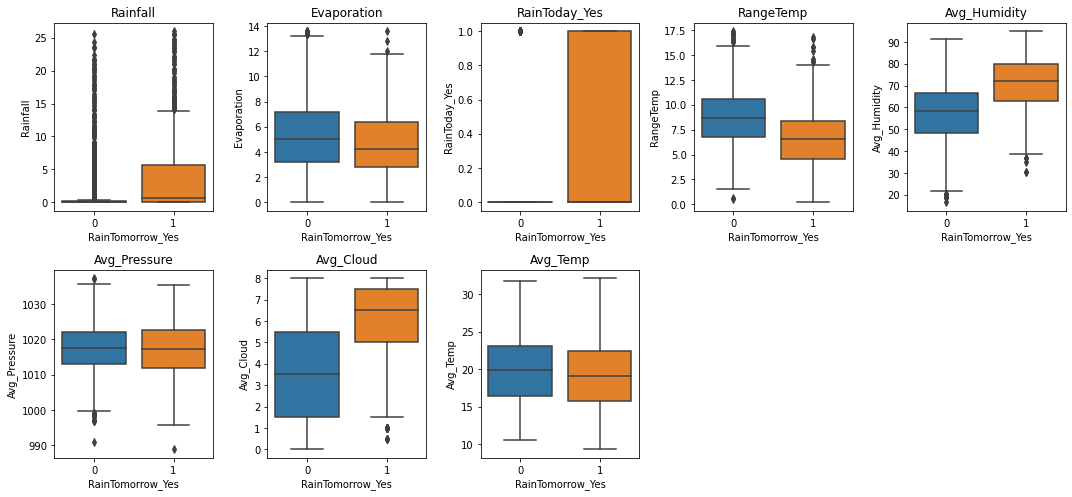

In [32]:
numeric_features = [ 'Rainfall', 'Evaporation', 'RainToday_Yes','RangeTemp','Avg_Humidity','Avg_Pressure','Avg_Cloud','Avg_Temp']

# Visualizing the relationship between numeric features and target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x='RainTomorrow_Yes', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

### Steps Performing In Training the Model 

#### a. Taking all independent features or variables into X 
#### b. Taking only Target feature or variable in y
#### c. Splitting Train-Test data into 70:30 ratio
#### d. Implementing the available Classification model's , making prediction on the test data  and then  evaluating the model's performance using suitable metrics  

##  X-y split  

In [33]:
X = df.drop(['RainTomorrow_Yes'] , axis=1)
y = df['RainTomorrow_Yes']

In [34]:
X.head()

,Rainfall,Evaporation,RainToday_Yes,RangeTemp,Avg_Humidity,Avg_Pressure,Avg_Cloud,Avg_Temp
0,15.6,6.2,1,2.9,88.0,1017.50,8.0,20.80
1,6.0,3.4,1,6.1,78.0,1017.15,7.0,23.60
2,6.6,2.4,1,2.9,87.0,1016.15,7.5,23.25
3,18.8,2.2,1,2.6,86.5,1013.00,8.0,21.15
5,1.6,2.6,1,7.0,65.5,1000.65,6.0,24.90


In [35]:
X.shape

(2569, 8)

In [36]:
y.head()

0    1
1    1
2    1
3    1
5    1
Name: RainTomorrow_Yes, dtype: uint8

In [37]:
y.shape

(2569,)

### Test-Train Split  

### Applying Multiple Logistic Regression Model  

In [38]:
# Splitting Train-Test data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
# Applying Multiple Linear Regression Model
model = LogisticRegression()

In [40]:
y_test.shape

(514,)

In [41]:
# Standardize the data
scaler = StandardScaler()
X_train_lg = scaler.fit_transform(X_train)
X_test_lg = scaler.transform(X_test)

# Fitting the model
model.fit(X_train_lg, y_train)

# Making predictions on the test data
y_pred_lg = model.predict(X_test_lg)

In [42]:
accuracy_log_reg = accuracy_score(y_test, y_pred_lg)

In [43]:
print("Accuracy of Logistic Regression:", accuracy_log_reg)

Accuracy of Logistic Regression: 0.8229571984435797


In [44]:
# Create confusion matrix 
confusion_matrix_log_reg= confusion_matrix(y_test, y_pred_lg)

In [45]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_log_reg)

Confusion Matrix for Logistic Regression:
[[364  24]
 [ 67  59]]


### Applying Ridge

In [46]:
# Standardize the data
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train)
X_test_r = scaler.transform(X_test)

ridge_model = RidgeClassifier(alpha=1.0)
ridge_model.fit(X_train_r, y_train)
y_pred_ridge = ridge_model.predict(X_test_r)

In [47]:
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print("Accuracy of Ridge:")
accuracy_ridge

Accuracy of Ridge:


0.8268482490272373

In [48]:
# Create confusion matrix 
confusion_matrix_ridge= confusion_matrix(y_test, y_pred_ridge)

In [49]:
print("Confusion Matrix for Ridge:")
print(confusion_matrix_ridge)

Confusion Matrix for Ridge:
[[369  19]
 [ 70  56]]


### XG Boost 

In [50]:
xgb_clf=xgb.XGBClassifier(max_depth=3,n_estimators=100,n_jobs=-1)

# Standardize the data
scaler = StandardScaler()
X_train_ab = scaler.fit_transform(X_train)
X_test_ab= scaler.transform(X_test)

# Fitting the model
xgb_clf.fit(X_train_ab,y_train)
# Predicting the model on the test data
y_pred_ab = xgb_clf.predict(X_test_ab)
accuracy_score(y_test,y_pred_ab)

0.7937743190661478

In [51]:
# Create confusion matrix 
confusion_matrix_ridge_xg= confusion_matrix(y_test, y_pred_ab)
print("Confusion Matrix for XG Boost:")
print(confusion_matrix_ridge_xg)

Confusion Matrix for XG Boost:
[[351  37]
 [ 69  57]]


### LinearDiscriminantAnalysis

In [52]:
model = LinearDiscriminantAnalysis()

In [53]:
# Standardize the data
scaler = StandardScaler()
X_train_l = scaler.fit_transform(X_train)
X_test_l = scaler.transform(X_test)

# Fitting the model
model.fit(X_train_l, y_train)

# Making predictions on the test data
y_pred_l = model.predict(X_test_l)

In [54]:
accuracy_lda = accuracy_score(y_test, y_pred_l)
print("Accuracy of LDA:", accuracy_lda)

Accuracy of LDA: 0.8326848249027238


In [55]:
# Create confusion matrix 
confusion_matrix_lda= confusion_matrix(y_test, y_pred_l)

In [56]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_lda)

Confusion Matrix for Logistic Regression:
[[364  24]
 [ 62  64]]


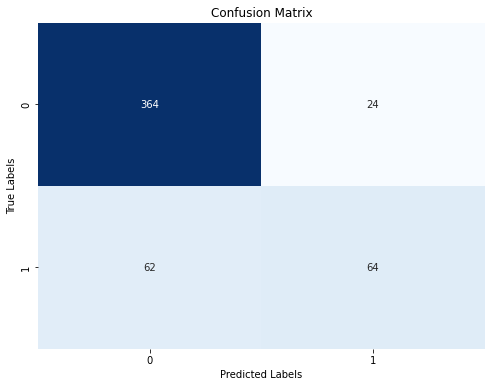

In [57]:
# Visualizing confusion matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_l)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

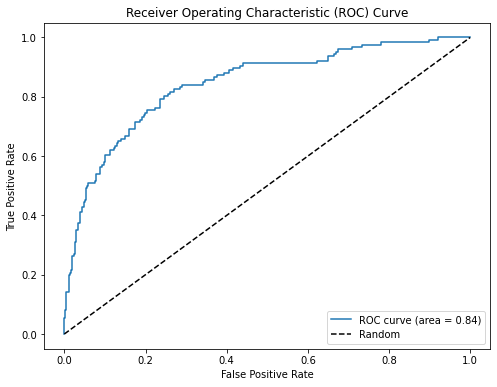

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probs_l = model.predict_proba(X_test_l)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_l)
roc_auc = roc_auc_score(y_test, y_probs_l)

# Ploting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve has an area of 0.84, which means that  LDA model has some level of discrimination power and is better than random guessing

### KNN  

In [59]:
model = KNeighborsClassifier(n_neighbors=5) 
# Standardize the data
scaler = StandardScaler()
X_train_k = scaler.fit_transform(X_train)
X_test_k = scaler.transform(X_test)

# Train the KNN classifier
model.fit(X_train_k, y_train)

# Make predictions on the test set
y_pred_k =model.predict(X_test_k)

In [60]:
accuracy_knn = accuracy_score(y_test, y_pred_k)
print("Accuracy of LDA:", accuracy_knn)

Accuracy of LDA: 0.8054474708171206


In [61]:
# Create confusion matrix 
confusion_matrix_knn= confusion_matrix(y_test, y_pred_k)

In [62]:
print("Confusion Matrix for KNN:")
print(confusion_matrix_knn)

Confusion Matrix for KNN:
[[355  33]
 [ 67  59]]


### Applying Decision Tree 

In [63]:
# Implementing Decision Tree
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [64]:
# Standardize the data
scaler = StandardScaler()
X_train_t = scaler.fit_transform(X_train)
X_test_t = scaler.transform(X_test)

# Fitting the model
clftree.fit(X_train_t,y_train)

# Predicting the model on the test data
y_pred_t = clftree.predict(X_test_t)

accuracy_dt = accuracy_score(y_test, y_pred_t)
print("Accuracy of DT:", accuracy_dt)


Accuracy of DT: 0.7957198443579766


In [65]:
# Create confusion matrix 
confusion_matrix_dt= confusion_matrix(y_test, y_pred_t)
print("Confusion Matrix for DT:")
print(confusion_matrix_dt)

Confusion Matrix for DT:
[[373  15]
 [ 90  36]]


### Applying Bagging 

In [66]:
from sklearn.ensemble import BaggingClassifier
bag_clf=BaggingClassifier()
# Standardize the data
scaler = StandardScaler()
X_train_b = scaler.fit_transform(X_train)
X_test_b = scaler.transform(X_test)
# Fitting the model
bag_clf.fit(X_train_b,y_train)
# Predicting the model on the test data
y_pred_b = bag_clf.predict(X_test_b)
accuracy_b = accuracy_score(y_test, y_pred_b)
print("Accuracy of Bagging:", accuracy_b)

Accuracy of Bagging: 0.8035019455252919


In [67]:
# Create confusion matrix 
confusion_matrix_b= confusion_matrix(y_test, y_pred_b)
print("Confusion Matrix for Bagging:")
print(confusion_matrix_b)

Confusion Matrix for Bagging:
[[361  27]
 [ 74  52]]


## Random Forest  

In [68]:
# Implementing Random Forest
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train_f = scaler.fit_transform(X_train)
X_test_f = scaler.transform(X_test)

# Fitting the model
rf_clf.fit(X_train_f, y_train)

# Predicting the model on the test data
y_pred_f = rf_clf.predict(X_test_f)

accuracy_f = accuracy_score(y_test, y_pred_f)
print("Accuracy of Bagging:", accuracy_f)


Accuracy of Bagging: 0.8190661478599222


In [69]:
# Create confusion matrix 
confusion_matrix_f= confusion_matrix(y_test, y_pred_f)
print("Confusion Matrix for Bagging:")
print(confusion_matrix_f)

Confusion Matrix for Bagging:
[[369  19]
 [ 74  52]]


### Gradient Boosting 

In [70]:
# Implementing Gradient Boosting
gbr_clf=GradientBoostingClassifier()
# Standardize the data
scaler = StandardScaler()
X_train_g = scaler.fit_transform(X_train)
X_test_g = scaler.transform(X_test)
# Fitting the model
gbr_clf.fit(X_train_g,y_train)


# Predicting the model on the test data
y_pred_g = gbr_clf.predict(X_test_g)

accuracy_g = accuracy_score(y_test, y_pred_g)
print("Accuracy of Bagging:", accuracy_g)

Accuracy of Bagging: 0.8190661478599222


In [71]:
# Create confusion matrix 
confusion_matrix_g= confusion_matrix(y_test, y_pred_g)
print("Confusion Matrix for Bagging:")
print(confusion_matrix_g)

Confusion Matrix for Bagging:
[[367  21]
 [ 72  54]]


### Ada Boost  

In [72]:
from sklearn.ensemble import AdaBoostClassifier
# Implementing Ada Boost
ada_clf=AdaBoostClassifier(n_estimators=500)
# Standardize the data
scaler = StandardScaler()
X_train_ab = scaler.fit_transform(X_train)
X_test_ab= scaler.transform(X_test)

# Fitting the model
ada_clf.fit(X_train_ab,y_train)

# Predicting the model on the test data
y_pred_ab = ada_clf.predict(X_test_ab)

accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy of Bagging:", accuracy_ab)

Accuracy of Bagging: 0.7859922178988327


In [73]:
# Create confusion matrix 
confusion_matrix_ab= confusion_matrix(y_test, y_pred_ab)
print("Confusion Matrix for Bagging:")
print(confusion_matrix_ab)

Confusion Matrix for Bagging:
[[351  37]
 [ 73  53]]
